# Load data and get some insights

In [2]:
import pandas as pd

def load_csv_from_path(path):
    """
    Helper function to open a CSV file using pandas.
    :param path: string indicating the CSV file path
    :return: pandas DataFrame
    """
    return pd.read_csv(path)

# store path in a descriptive variable
data_path = "/Users/medisa/repos/Test/retail_sales_data.csv"

# load into a DataFrame safely
df_raw = load_csv_from_path(data_path)

# make a working copy
df = df_raw.copy()


In [3]:
def get_df_insights(df):
    """
    Display basic insights about a pandas DataFrame.
    """
    print("First five rows of the DataFrame:")
    print(df.head(), "\n\n")

    print("Basic info about the DataFrame:")
    df.info()
    print("\n")

    print("Statistical summary of numeric columns:")
    print(df.describe(), "\n")

get_df_insights(df)

First five rows of the DataFrame:
  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor          NaN         2  1364.68   
2      TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3      TXN00004   CUST0072       Mouse          NaN         1    91.89   
4      TXN00005   CUST0061      Laptop  Accessories         3  1719.75   

  TransactionDate Region  
0      2021-12-04  North  
1      12/04/2022   East  
2      27/01/2022   East  
3      22/10/2022  South  
4      17/05/2021    NaN   


Basic info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    205 non-null    object 
 1   CustomerID       205 non-null    object 
 2   Product          205 non-null  

# Data Cleaning

In [4]:
# df.isnull() → returns True/False for each cell
# .sum() → counts the number of Trues per column

def missing_values(dataframe):
    """
    Checks and returns the number of missing values in each column.
    """
    missing_count = dataframe.isnull().sum()
    print("Missing values per column:\n")
    return missing_count

missing_values(df)

Missing values per column:



TransactionID       0
CustomerID          0
Product             0
Category           49
Quantity            0
Price               0
TransactionDate     0
Region             38
dtype: int64

# Finding and Removing Duplicates

In [5]:
#this function takes the dataframe,
#makes a copy inside (to be extra safe in future)
#calculates the number of duplicates
#prints and returns that number

def check_duplicates(df):
    """
    Check how many duplicate rows exist in the Dataframe.
    Does not modify the original.
    """
    df_copy = df.copy()

    #create a mask of which rows are duplicates
    duplicate_mask = df_copy.duplicated()
    num_duplicates = duplicate_mask.sum()

    print(f"Number of duplicate rows: {num_duplicates}")
    return num_duplicates

check_duplicates(df)


Number of duplicate rows: 5


np.int64(5)

### Inspect the Duplicate Rows

In [6]:
# I want to see which rows are duplicates before I remove them. That requires anew helper function.

def get_duplicate_rows(df):
    """
    Return the actual duplicate rows for inspection.
    Does NoT modify the original.
    """

    df_copy = df.copy()
    duplicate_mask = df_copy.duplicated(keep=False)
    duplicate_rows = df_copy[duplicate_mask]
    return duplicate_rows

get_duplicate_rows(df)

,TransactionID,CustomerID,Product,Category,Quantity,Price,TransactionDate,Region
15,TXN00016,CUST0053,Mouse,NaN,4,412.34,30/10/2021,East
30,TXN00031,CUST0091,Smartphone,NaN,1,752.92,26/04/2021,South
95,TXN00096,CUST0085,Mouse,Gadgets,3,142.13,2021-06-12,North
128,TXN00129,CUST0012,Smartphone,NaN,1,1055.89,30/12/2022,North
158,TXN00159,CUST0063,Keyboard,Electronics,4,674.10,19/05/2021,West
200,TXN00096,CUST0085,Mouse,Gadgets,3,142.13,2021-06-12,North
201,TXN00016,CUST0053,Mouse,NaN,4,412.34,30/10/2021,East
202,TXN00031,CUST0091,Smartphone,NaN,1,752.92,26/04/2021,South
203,TXN00159,CUST0063,Keyboard,Electronics,4,674.10,19/05/2021,West
204,TXN00129,CUST0012,Smartphone,NaN,1,1055.89,30/12/2022,North


# Remove the Duplicates Safely

In [7]:
def remove_duplicates(df):
    """
    Safely removes duplicate rows.
    Returns a new cleaned Dataframe.
    """

    df_copy = df.copy()
    df_copy = df_copy.drop_duplicates()
    return df_copy

df_no_duplicates = remove_duplicates(df)
print(df_no_duplicates)

    TransactionID CustomerID     Product     Category  Quantity    Price  \
0        TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1        TXN00002   CUST0093     Monitor          NaN         2  1364.68   
2        TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3        TXN00004   CUST0072       Mouse          NaN         1    91.89   
4        TXN00005   CUST0061      Laptop  Accessories         3  1719.75   
..            ...        ...         ...          ...       ...      ...   
195      TXN00196   CUST0077  Headphones      Gadgets         3  1597.12   
196      TXN00197   CUST0003    Keyboard      Gadgets         2  1357.86   
197      TXN00198   CUST0070  Smartphone      Gadgets         4   714.29   
198      TXN00199   CUST0072       Mouse  Accessories         3  1894.58   
199      TXN00200   CUST0027  Smartphone  Electronics         3   722.11   

    TransactionDate Region  
0        2021-12-04  North  
1        12/04/2022   East  


# Handling missing Values

In [8]:
#I've already wrote a function to count missing values:
#missing_values(df)
#I want to run that function on my deduplicated dataframe:

missing_values(df_no_duplicates)
#

Missing values per column:



TransactionID       0
CustomerID          0
Product             0
Category           46
Quantity            0
Price               0
TransactionDate     0
Region             38
dtype: int64

In [9]:
#I have two options for missing values. Fill them with "Unknwn, or fill them with the most frequent value(mode).(great for categorical columns with clear, common values.)
#To decide the best strategy, we need t know:
#What are the unique values in Category and Region?
#This tells us if "mode" is meaningful.

print("The value of the Category is:")
print(df_no_duplicates['Category'].value_counts())
print("\n")
print("The value of region is:")
print(df_no_duplicates['Region'].value_counts())


The value of the Category is:
Category
Accessories    55
Electronics    54
Gadgets        45
Name: count, dtype: int64


The value of region is:
Region
South    43
East     40
West     40
North    39
Name: count, dtype: int64


### Filling missing vlues with 'Unknown'

In [10]:
def clean_missing_values(df):
    """
    This fills all the missing values with 'Unknown'.
    Does not change the original dataframe
    """
    df_copy = df.copy()
    df_copy['Region'] = df_copy['Region'].fillna('Unknown')
    df_copy['Category'] = df_copy['Category'].fillna('Unknown')
    return df_copy

df_clean_missing = clean_missing_values(df_no_duplicates)
print(df_clean_missing)

    TransactionID CustomerID     Product     Category  Quantity    Price  \
0        TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1        TXN00002   CUST0093     Monitor      Unknown         2  1364.68   
2        TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3        TXN00004   CUST0072       Mouse      Unknown         1    91.89   
4        TXN00005   CUST0061      Laptop  Accessories         3  1719.75   
..            ...        ...         ...          ...       ...      ...   
195      TXN00196   CUST0077  Headphones      Gadgets         3  1597.12   
196      TXN00197   CUST0003    Keyboard      Gadgets         2  1357.86   
197      TXN00198   CUST0070  Smartphone      Gadgets         4   714.29   
198      TXN00199   CUST0072       Mouse  Accessories         3  1894.58   
199      TXN00200   CUST0027  Smartphone  Electronics         3   722.11   

    TransactionDate   Region  
0        2021-12-04    North  
1        12/04/2022     E

In [11]:
#double check the missing values:
missing_values(df_clean_missing)

Missing values per column:



TransactionID      0
CustomerID         0
Product            0
Category           0
Quantity           0
Price              0
TransactionDate    0
Region             0
dtype: int64

# Standardizing the date column safely

In [12]:
#Before writing the function, let's inspect the data

df_clean_missing['TransactionDate'].head(10)

0    2021-12-04
1    12/04/2022
2    27/01/2022
3    22/10/2022
4    17/05/2021
5    06/10/2021
6    26/12/2022
7    01/09/2021
8    22/07/2021
9    05/01/2022
Name: TransactionDate, dtype: object

In [13]:
#fix the date formats with a helper function
import pandas as pd

def standardize_transaction_date(df):
    """
    Convert TransactionDate column to datetime.
    Does NOT change the original dataframe.
    """
    df_copy = df.copy()

    df_copy['TransactionDate'] = pd.to_datetime(
        df_copy['TransactionDate'],
        dayfirst = True,
        errors = 'coerce'
    )

    return df_copy

df_dates_clean = standardize_transaction_date(df_clean_missing)
print(df_dates_clean.head(10))
print(df_dates_clean['TransactionDate'].dtype)

  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor      Unknown         2  1364.68   
2      TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3      TXN00004   CUST0072       Mouse      Unknown         1    91.89   
4      TXN00005   CUST0061      Laptop  Accessories         3  1719.75   
5      TXN00006   CUST0021     Monitor  Accessories         2  1108.25   
6      TXN00007   CUST0083       Mouse      Gadgets         4   645.56   
7      TXN00008   CUST0087      Tablet      Unknown         4   572.66   
8      TXN00009   CUST0075  Headphones  Accessories         3  1687.33   
9      TXN00010   CUST0075      Laptop      Unknown         3   647.58   

  TransactionDate   Region  
0      2021-04-12    North  
1             NaT     East  
2             NaT     East  
3             NaT    South  
4             NaT  Unknown  
5          

In [14]:
# I tried to convert the TransactionDate column data to datetime, but some of them appeared as NaT.
# This time, I'm trying another format to convert NaT data to real date time
# I'm handling the mixed formats with two-pass parser

import pandas as pd

def standardize_transaction_date(df):
    """
    Safely convert mixed-format date strings into datetime.
    Does not modify the original dataframe.
    """
    df_copy = df.copy()

    # Pass 1: Try default parsing(flexible parser)
    converted_dates = pd.to_datetime(df_copy["TransactionDate"], errors="coerce")  #converted_dates is the converted date column, but with some rows possibly still invalid (NaT).

    # Pass 2: Parse remaining NaT values using day-first format(strict DD/MM/YYYY parsing for failures)
    failed_rows = converted_dates.isna()   #Finds which rows failed

    converted_dates[failed_rows] = pd.to_datetime(df_copy.loc[failed_rows, "TransactionDate"],   #Tries a specific format on the failed rows
                             format="%d/%m/%Y",
                             errors="coerce")

    df_copy["TransactionDate"] = converted_dates.copy()  #Replace the original column with converted dates

    return df_copy

df_dates_clean = standardize_transaction_date(df_clean_missing)  # Define a new variable for our dataframe with cleaned dates
print(df_dates_clean.head(20))   # prnt the first 20 rows to see if the code converted the dates successfully
print(df_dates_clean['TransactionDate'].dtype)  # Confirm the column is now a proper datetime type



   TransactionID CustomerID     Product     Category  Quantity    Price  \
0       TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1       TXN00002   CUST0093     Monitor      Unknown         2  1364.68   
2       TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3       TXN00004   CUST0072       Mouse      Unknown         1    91.89   
4       TXN00005   CUST0061      Laptop  Accessories         3  1719.75   
5       TXN00006   CUST0021     Monitor  Accessories         2  1108.25   
6       TXN00007   CUST0083       Mouse      Gadgets         4   645.56   
7       TXN00008   CUST0087      Tablet      Unknown         4   572.66   
8       TXN00009   CUST0075  Headphones  Accessories         3  1687.33   
9       TXN00010   CUST0075      Laptop      Unknown         3   647.58   
10      TXN00011   CUST0088     Monitor      Unknown         2  1644.28   
11      TXN00012   CUST0100    Keyboard      Unknown         4  1091.20   
12      TXN00013   CUST00

# Categorical Normalization

In [36]:
# Before building a helper function, I need to know:
# What category names need fixing
# Whether region names are messy
# Whether product names have inconsistent casing/spaces

print(df_dates_clean['Category'].unique())
print(df_dates_clean['Region'].unique())
print(df_dates_clean['Product'].unique()[:20]) # The first 20 product names only


['Electronics' 'Unknown' 'Accessories' 'Gadgets']
['North' 'East' 'South' 'Unknown' 'West']
['Camera' 'Monitor' 'Smartphone' 'Mouse' 'Laptop' 'Tablet' 'Headphones'
 'Keyboard']


##### All three columns look clean and no inconsistent format, typos or trailing spaces detected

# Create Sales Column before EDA

Before starting EDA, I create a new column called "Sales = Price * Quantity"

This will let me analyze Revenue trends, top products, top categories,
seasonal revenue, monthly sales changes and outliers in transaction amouts


In [37]:
# Before creating sales column, I make sure both "Price" and "Quantity" are numeric
# Even if they look numeric, sometimes they come in as strings, especially if the CSV has quotes or commas
# So I safely convert them to numeric inside the functon


def add_sales_column(df):
    """
    Safely create a Sales column as Price * Quantity.
    Dos Not modify the original dataframe,
    """
    df_copy = df.copy()

    # Ensure numeric types
    df_copy['Price'] = pd.to_numeric(df_copy['Price'] , errors='coerce')
    df_copy['Quantity'] = pd.to_numeric(df_copy['Quantity'] , errors = 'coerce')

    # Create Sales column
    df_copy['Sales'] = df_copy['Price'] * df_copy['Quantity']

    return df_copy

df_with_sales = add_sales_column(df_dates_clean)
print(df_with_sales.head())

  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor      Unknown         2  1364.68   
2      TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3      TXN00004   CUST0072       Mouse      Unknown         1    91.89   
4      TXN00005   CUST0061      Laptop  Accessories         3  1719.75   

  TransactionDate   Region    Sales  
0      2021-12-04    North  1489.74  
1      2022-04-12     East  2729.36  
2      2022-01-27     East  1004.30  
3      2022-10-22    South    91.89  
4      2021-05-17  Unknown  5159.25  


# EDA (Exploratory Data Analysis) 

First, I create time-based features(Year, Month, Quarter) that make time series analysis possible

In [38]:
# Clean helper function to create time-based features

def add_time_features(df):
    """
    Add year, Month and Quarter columns based on TransactionDate.
    Does NOT modify the original dataframe.
    """
    df_copy = df.copy()

    df_copy["Year"] = df_copy["TransactionDate"].dt.year
    df_copy["Month"] = df_copy["TransactionDate"].dt.month
    df_copy["Quarter"] = df_copy["TransactionDate"].dt.quarter

    return df_copy

df_time = add_time_features(df_with_sales)
print(df_time.head())

  TransactionID CustomerID     Product     Category  Quantity    Price  \
0      TXN00001   CUST0052      Camera  Electronics         1  1489.74   
1      TXN00002   CUST0093     Monitor      Unknown         2  1364.68   
2      TXN00003   CUST0015  Smartphone  Accessories         1  1004.30   
3      TXN00004   CUST0072       Mouse      Unknown         1    91.89   
4      TXN00005   CUST0061      Laptop  Accessories         3  1719.75   

  TransactionDate   Region    Sales  Year  Month  Quarter  
0      2021-12-04    North  1489.74  2021     12        4  
1      2022-04-12     East  2729.36  2022      4        2  
2      2022-01-27     East  1004.30  2022      1        1  
3      2022-10-22    South    91.89  2022     10        4  
4      2021-05-17  Unknown  5159.25  2021      5        2  


## Now my dataset is ready for time-based EDA

First, I calculate monthly sales using my cleaned dataframe: 
df_time(the one with Year, Month, Quarter and Sales)

In [39]:
# First, I calculate monthly sales using my cleaned dataframe: 
# df_time(the one with Year, Month, Quarter and Sales)

# Group by Year + Month to get total monthly sales
monthly_sales = df_time.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# My data spans multiple years,
# So “Month” alone is not enough. I need both Year and Month on the x-axis.
# So I’ll create a new column:
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + "-" + monthly_sales['Month'].astype(str)

print(monthly_sales.head())

   Year  Month     Sales YearMonth
0  2021      1  33679.31    2021-1
1  2021      2  21978.88    2021-2
2  2021      3  11475.42    2021-3
3  2021      4  19585.15    2021-4
4  2021      5  42914.84    2021-5


# Monthly Sales Line Plot

#### Visualization part of EDA, Customer purchase behavior over time

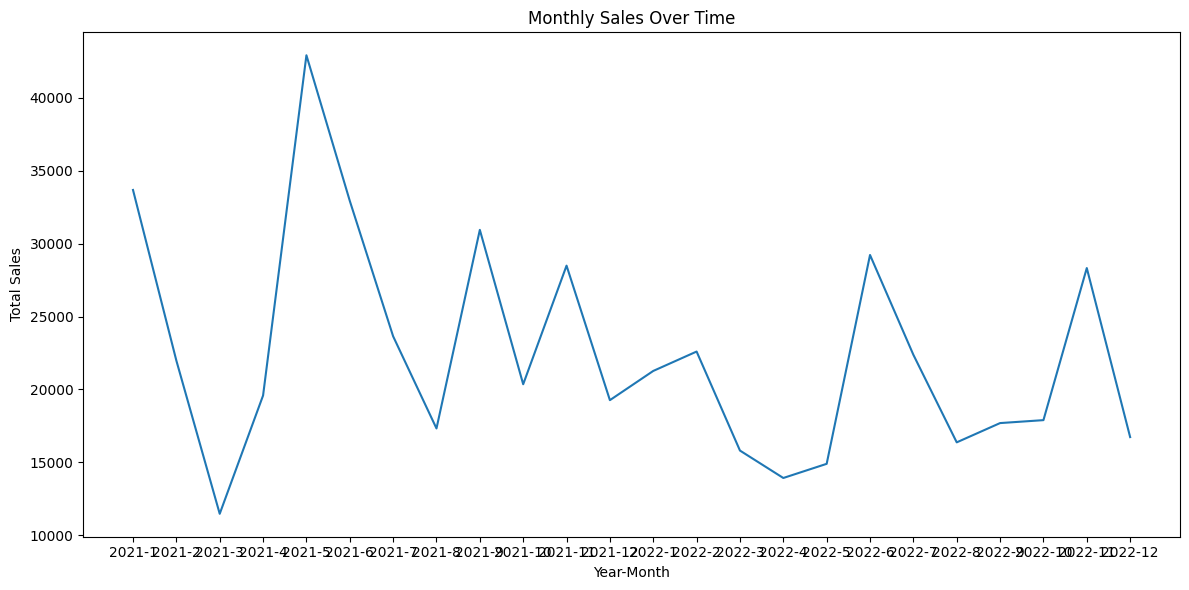

In [40]:
# I'll create a simple clean line plot using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'])
plt.title("Monthly Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**So far, I Have:**

* df_with_sales → clean dataset

* df_time → with Year, Month, Quarter

* monthly_sales → grouped results

* monthly_sales["YearMonth"] → correct plot labels

* A working monthly line plot

# Seasonal Trend

In [41]:
# Creating quarterly sales table, so we can create the plot from the table
quarterly_sales = df_time.groupby(["Year","Quarter"])["Sales"].sum().reset_index()
print(quarterly_sales.head())


   Year  Quarter     Sales
0  2021        1  67133.61
1  2021        2  95433.80
2  2021        3  71916.27
3  2021        4  68114.56
4  2022        1  59681.06


## Pivot the Data

In [35]:
# Four seperate lines so I can clearly see:
# how each quarter changes across years
# which quarter is strongest
# which quarter is weakest
# whether seasonal patterns strengthen or fade over time


# To plot 4 lines, I need a pivot table so each quarter becomes a column:
quarterly_pivot = quarterly_sales.pivot(
    index = "Year",
    columns = "Quarter",
    values = "Sales"
)

print(quarterly_pivot)

Quarter         1         2         3         4
Year                                           
2021     67133.61  95433.80  71916.27  68114.56
2022     59681.06  58052.18  56446.77  62955.88


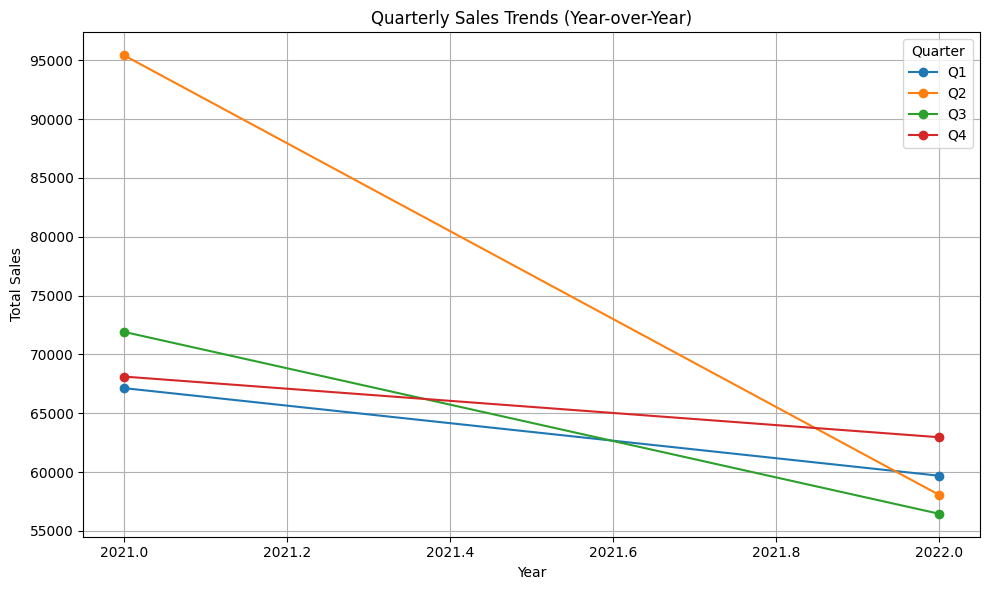

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(quarterly_pivot.index, quarterly_pivot[1], marker='o', label='Q1')
plt.plot(quarterly_pivot.index, quarterly_pivot[2], marker='o', label='Q2')
plt.plot(quarterly_pivot.index, quarterly_pivot[3], marker='o', label='Q3')
plt.plot(quarterly_pivot.index, quarterly_pivot[4], marker='o', label='Q4')

plt.title("Quarterly Sales Trends (Year-over-Year)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()



#### Quarterly sales declined across all quarters from 2021 to 2022.
#### This indicates a broad drop in customer spending rather than a seasonal fluctuation.

# Group by Product to find total sales per product

In [44]:
product_sales = df_time.groupby("Product")["Sales"].sum().reset_index()
print(product_sales)

      Product     Sales
0      Camera  56844.53
1  Headphones  72811.94
2    Keyboard  66698.41
3      Laptop  56857.62
4     Monitor  73044.62
5       Mouse  81497.46
6  Smartphone  71903.53
7      Tablet  60076.02


# Visualize Top Products (Bar Plot)

<function matplotlib.pyplot.show(close=None, block=None)>

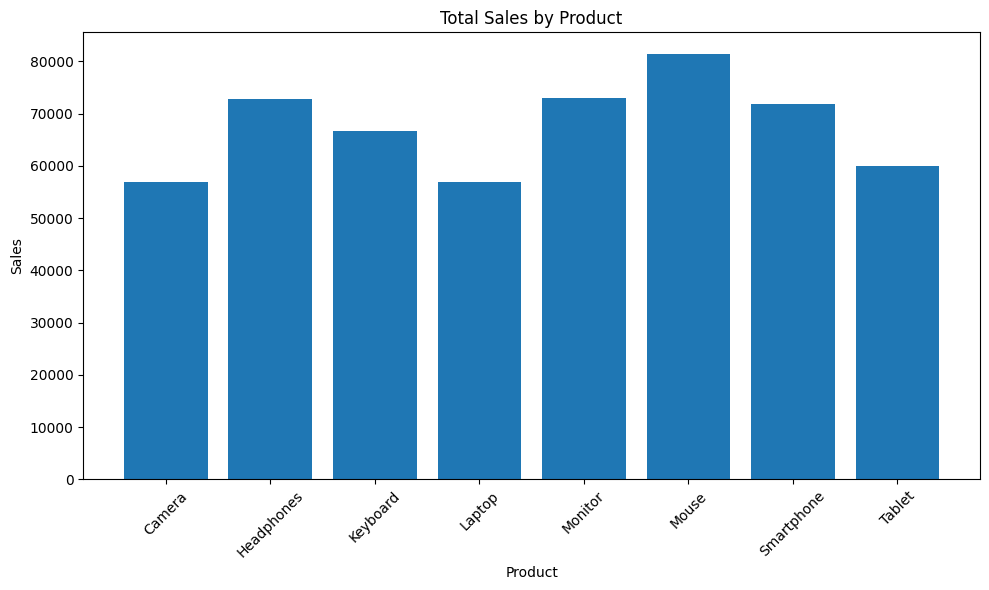

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(product_sales["Product"],product_sales["Sales"])
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

**Insight:**

*Mouse generated the highest total revenue among all products, followed by Monitor and Headphones. Camera and Laptop are the lowest revenue generators, indicating they may have lower demand or lower pricing.*

